In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


In [2]:
data=pd.read_csv(r"C:\Users\tando\Downloads\Algerian_forest_fires_dataset_UPDATE (1).csv",header=1)

In [3]:
df=pd.DataFrame(data)

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
dfc=df

# Cleaning the data


In [6]:
ind=dfc[dfc["day"]=="Sidi-Bel Abbes Region Dataset"].index

In [7]:
ind

Int64Index([122], dtype='int64')

In [8]:
actual_index=ind[0]

In [9]:
actual_index

122

In [12]:
dfc.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

In [13]:
dfc.iloc[123]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 123, dtype: object

In [14]:
dfc=dfc.drop([122],axis=0)

In [15]:
dfc=dfc.drop([123],axis=0)

In [16]:
dfc.iloc[122]

day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Name: 124, dtype: object

In [17]:
dfc["Region"]=0

In [18]:
dfc.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            236, 237, 238, 239, 240, 241, 242, 243, 244, 245],
           dtype='int64', length=244)

In [19]:
dfc.shape

(244, 15)

In [20]:
# Classifying region as 1 and 0

In [28]:
len(dfc.index)

244

In [31]:
for i in range(len(dfc.index)):
    if i<(actual_index-1):
        dfc['Region'].iloc[i]=0
    elif i>actual_index:
        dfc['Region'].iloc[i]=1


C:\Users\tando\AppData\Local\Temp\ipykernel_18268\64056252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Region'].iloc[i]=0
C:\Users\tando\AppData\Local\Temp\ipykernel_18268\64056252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Region'].iloc[i]=1


In [35]:
dfc["Region"].iloc[243]

1

In [36]:
dfc

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [37]:
dfc.iloc[165]

day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               1
Name: 167, dtype: object

In [38]:
dfc.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [39]:
dfc.columns=dfc.columns.str.strip()
dfc.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [40]:
dfc.Classes=dfc.Classes.str.strip()
dfc.Classes.unique()

array(['not fire', 'fire', nan], dtype=object)

In [41]:
dfc['DC'].iloc[165]=14.6

C:\Users\tando\AppData\Local\Temp\ipykernel_18268\2953325432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['DC'].iloc[165]=14.6


In [42]:
dfc['ISI'].iloc[165]=9

C:\Users\tando\AppData\Local\Temp\ipykernel_18268\3080214705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['ISI'].iloc[165]=9


In [43]:
dfc['BUI'].iloc[165]=12.5

C:\Users\tando\AppData\Local\Temp\ipykernel_18268\2676966524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['BUI'].iloc[165]=12.5


In [44]:
dfc['FWI'].iloc[165]=10.4

C:\Users\tando\AppData\Local\Temp\ipykernel_18268\669432078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['FWI'].iloc[165]=10.4


In [45]:
dfc['Classes'].iloc[165]="fire"

C:\Users\tando\AppData\Local\Temp\ipykernel_18268\2425148773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Classes'].iloc[165]="fire"


In [46]:
dfc.iloc[165]

day              14
month            07
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
Classes        fire
Region            1
Name: 167, dtype: object

In [47]:
dfc.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [49]:
dfc.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [50]:
dfc.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [51]:
# dfc.rename(columns={'Rain ':'Rain'},inplace=True)
# dfc.rename(columns={' RH':'RH'},inplace=True)
# dfc.rename(columns={' Ws':'Ws'},inplace=True)
# dfc.rename(columns={'Classes  ':'Classes'},inplace=True)

In [52]:
dfc.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [53]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [54]:
dfc.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [57]:
dfc['day']=pd.to_numeric(dfc['day'])
dfc['month']=pd.to_numeric(dfc['month'])
dfc=dfc.drop(['year'],axis=1)
dfc['Temperature']=pd.to_numeric(dfc['Temperature'])
dfc['RH']=pd.to_numeric(dfc['RH'])
dfc['Ws']=pd.to_numeric(dfc['Ws'])
dfc['Rain']=pd.to_numeric(dfc['Rain'])
dfc['FFMC']=pd.to_numeric(dfc['FFMC'])
dfc['DMC']=pd.to_numeric(dfc['DMC'])
dfc['DC']=pd.to_numeric(dfc['DC'])
dfc['ISI']=pd.to_numeric(dfc['ISI'])
dfc['BUI']=pd.to_numeric(dfc['BUI'])
dfc['FWI']=pd.to_numeric(dfc['FWI'])

In [58]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   Temperature  244 non-null    int64  
 3   RH           244 non-null    int64  
 4   Ws           244 non-null    int64  
 5   Rain         244 non-null    float64
 6   FFMC         244 non-null    float64
 7   DMC          244 non-null    float64
 8   DC           244 non-null    float64
 9   ISI          244 non-null    float64
 10  BUI          244 non-null    float64
 11  FWI          244 non-null    float64
 12  Classes      244 non-null    object 
 13  Region       244 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 28.6+ KB


In [59]:
dfc.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [60]:
dfc["Classes_Target"]=dfc["Classes"]

In [61]:
dfc.Classes_Target.unique()

array(['not fire', 'fire'], dtype=object)

In [62]:
dfc.head()



,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,not fire
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,not fire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,not fire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,not fire


In [63]:
dfc.tail()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_Target
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,fire
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,not fire
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,not fire
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,not fire
245,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1,not fire


In [64]:
# Encoding classes column as 1 or 0

In [65]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Classes'. 
dfc ['Classes_Target']= label_encoder.fit_transform(dfc['Classes_Target']) 
dfc.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,1


In [66]:
dfc.tail()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_Target
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,0
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,1
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,1
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,1
245,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1,1


In [69]:
dfc=dfc.drop(['Classes'],axis=1)


In [116]:
dfc

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


# Now the data is cleaned and is ready to use

In [70]:
# Fire---> 0
# Not Fire----> 1

<AxesSubplot:>

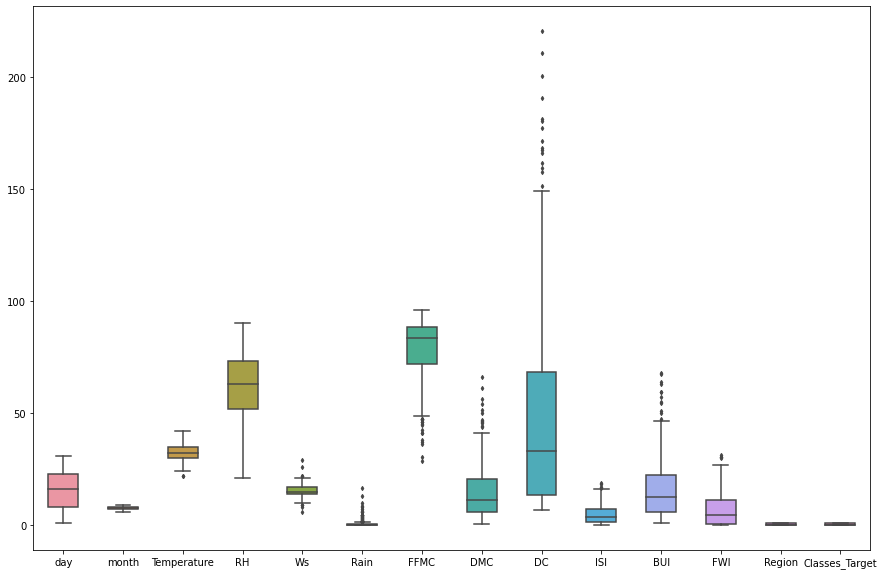

In [71]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dfc, width= 0.5,ax=ax,  fliersize=3)

In [72]:
q = dfc['Rain'].quantile(0.98)
# we are removing the top 2% data from the Rain column
dfc = dfc[dfc['Rain']<q]
q = dfc['FFMC'].quantile(0.99)
# we are removing the top 1% data from the FFMC column
dfc  = dfc[dfc['FFMC']<q]
q = dfc['DMC'].quantile(0.99)
# we are removing the top 1% data from the DMC column
dfc  = dfc[dfc['DMC']<q]
q = dfc['DC'].quantile(0.95)
# we are removing the top 5% data from the DC column
dfc  = dfc[dfc['DC']<q]
q = dfc['BUI'].quantile(0.99)
# we are removing the top 1% data from the BUI column
dfc  = dfc[dfc['BUI']<q]

<AxesSubplot:>

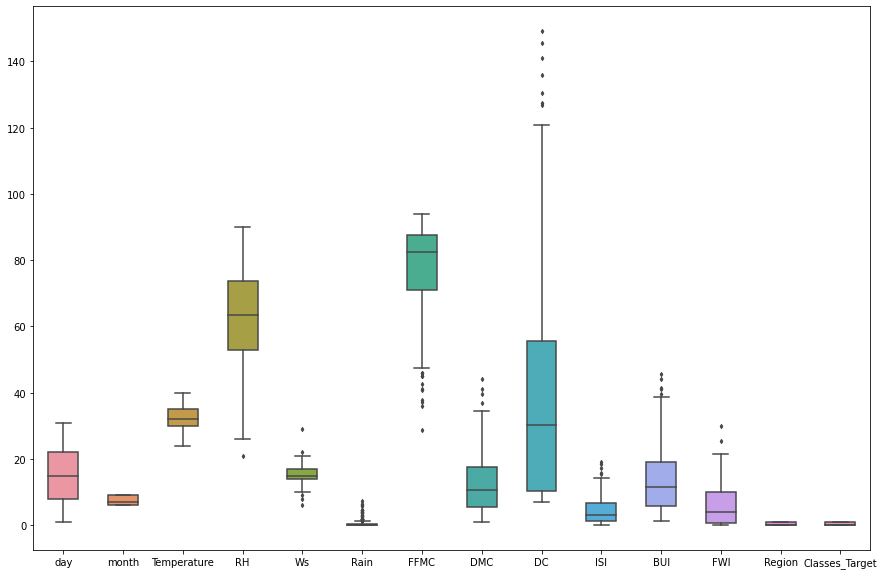

In [73]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dfc, width= 0.5,ax=ax,  fliersize=3)

In [74]:
from sklearn import preprocessing
from collections import Counter

In [75]:
print(sorted(Counter(dfc['Classes_Target']).items()))

[(0, 119), (1, 99)]


In [76]:
# 119 fire
# 99 not fire

In [77]:
# So our data is imbalanced

In [78]:
# Since the data is less we use oversampling

In [79]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [80]:
dfc['Classes_Target']

0      1
1      1
3      1
4      1
5      0
      ..
241    0
242    1
243    1
244    1
245    1
Name: Classes_Target, Length: 218, dtype: int32

In [81]:
X=dfc.iloc[:,:-1]

In [82]:
y=dfc.iloc[:,-1]

In [83]:
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [84]:
import imblearn
from imblearn import under_sampling, over_sampling

In [85]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,y)

In [86]:
y_resampled.shape

(238,)

In [87]:
sorted(Counter(y_resampled).items())

[(0, 119), (1, 119)]

In [88]:
# Now we can see the data is balanced

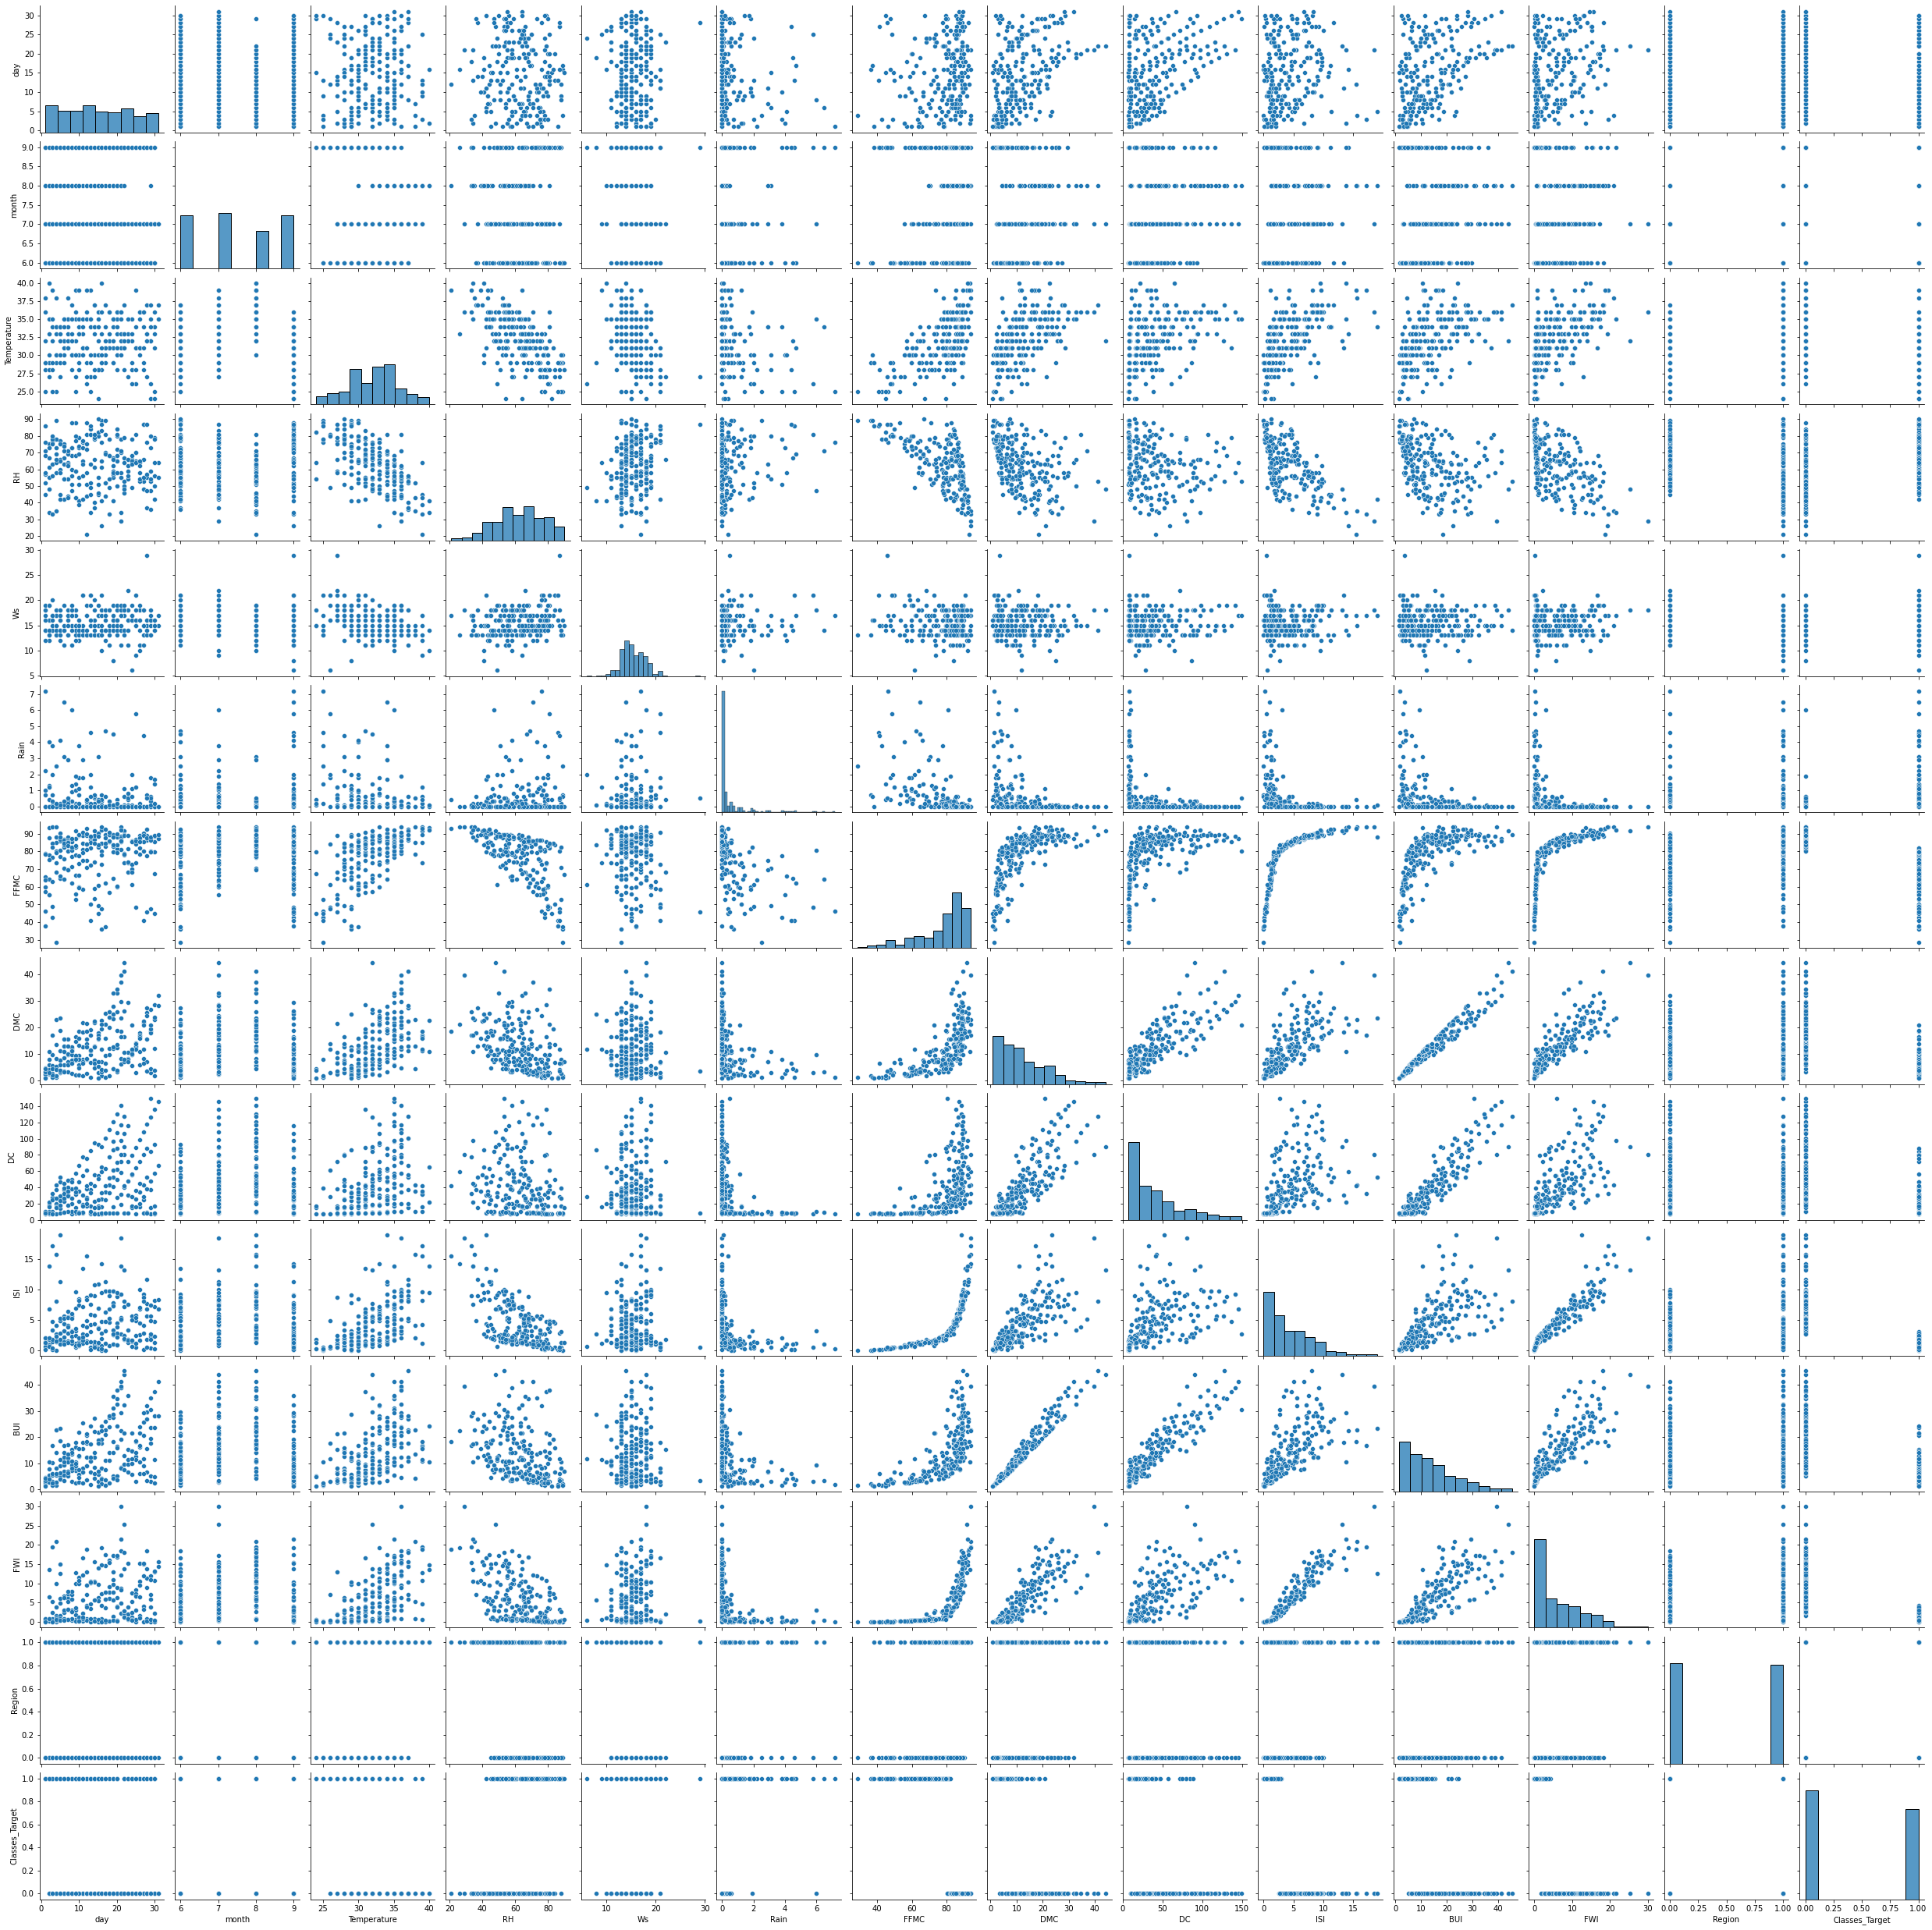

In [89]:
sns.pairplot(dfc)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_resampled, y_resampled, test_size=0.33, random_state=42)

In [92]:
X_train

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
96,18,9,32,49,11,0.0,89.4,9.8,33.1,6.8,11.3,7.7,0
65,6,8,32,75,14,0.0,86.4,13.0,39.1,5.2,14.2,6.8,0
175,8,8,37,56,11,0.0,87.4,11.2,20.2,5.2,11.0,5.9,1
201,14,9,28,81,15,0.0,84.6,12.6,41.5,4.3,14.3,5.7,1
140,3,7,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,28,9,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0
14,16,6,29,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0
92,13,9,25,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0.0,0
179,13,8,35,34,16,0.2,88.3,16.9,45.1,7.5,17.5,10.5,1


In [93]:
X_test

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
115,7,6,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,1
15,17,6,30,89,16,0.6,37.3,1.1,7.8,0.0,1.6,0.0,0
212,25,9,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,1
126,19,6,32,67,14,4.5,64.6,4.4,8.2,1.0,4.2,0.4,1
6,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,13,7,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,1
5,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0
56,28,7,33,76,15,0.0,86.5,24.4,117.8,5.6,32.1,11.3,0
228,19,6,32,67,14,4.5,64.6,4.4,8.2,1.0,4.2,0.4,1


In [94]:
y_train

96     0
65     0
175    0
201    0
140    0
      ..
106    1
14     1
92     1
179    0
102    1
Name: Classes_Target, Length: 159, dtype: int32

In [95]:
y_test

115    0
15     1
212    1
126    1
6      0
      ..
150    0
5      0
56     0
228    1
143    0
Name: Classes_Target, Length: 79, dtype: int32

In [96]:
# let's see how data is distributed for every column

C:\Users\tando\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tando\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tando\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

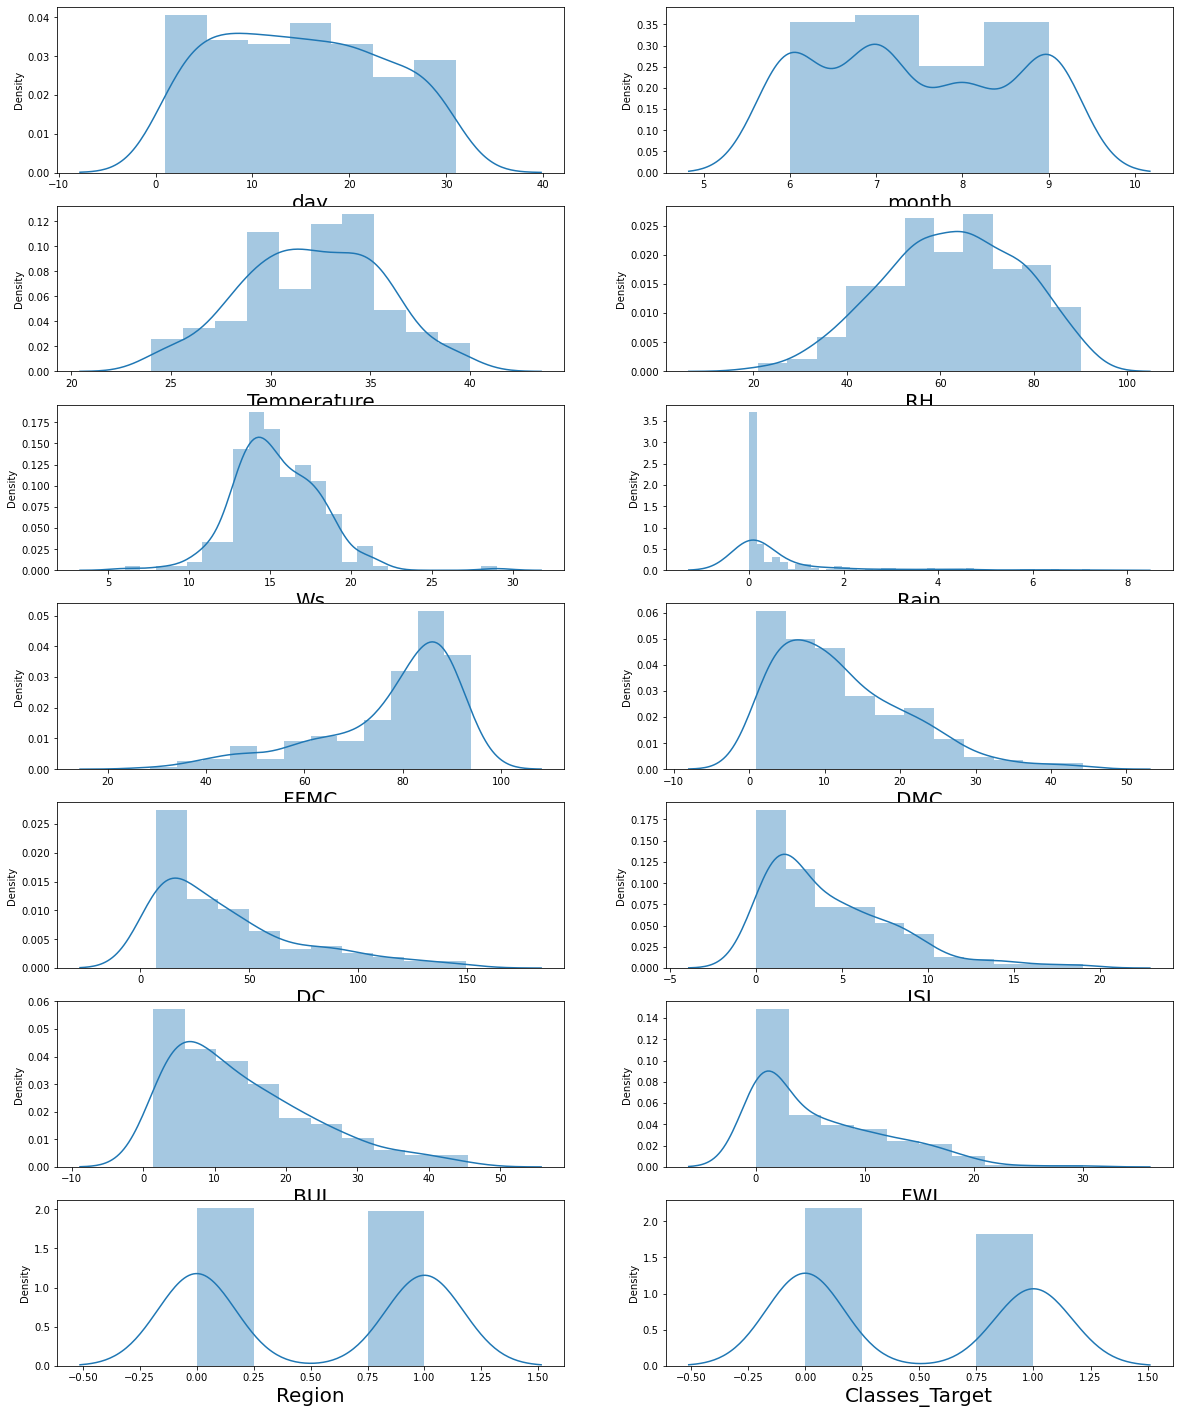

In [97]:
plt.figure(figsize=(20,25), facecolor='white')
num = 1

for column in dfc:
    if num<=14:     # as there are 14 columns in the data
        ax = plt.subplot(7,2,num)
        sns.distplot(dfc[column])
        plt.xlabel(column,fontsize=20)
    num+=1
plt.show()

In [98]:
dfc.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region', 'Classes_Target'],
      dtype='object')

In [99]:
scaler = StandardScaler()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_resampled, y_resampled, test_size=0.33, random_state=42)

In [101]:
X_train_after_Standardisation = scaler.fit_transform(X_train)
X_test_after_Standardisation = scaler.transform(X_test)

In [102]:
log_reg = LogisticRegression()

In [103]:
log_reg.fit(X_train_after_Standardisation,y_train)


LogisticRegression()

In [104]:
y_pred = log_reg.predict(X_test_after_Standardisation)

In [105]:
X_test

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
115,7,6,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,1
15,17,6,30,89,16,0.6,37.3,1.1,7.8,0.0,1.6,0.0,0
212,25,9,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,1
126,19,6,32,67,14,4.5,64.6,4.4,8.2,1.0,4.2,0.4,1
6,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,13,7,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,1
5,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0
56,28,7,33,76,15,0.0,86.5,24.4,117.8,5.6,32.1,11.3,0
228,19,6,32,67,14,4.5,64.6,4.4,8.2,1.0,4.2,0.4,1


In [106]:
accuracy_score(y_test,y_pred)

0.9113924050632911

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [108]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[35,  6],
       [ 1, 37]], dtype=int64)

In [109]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [110]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9113924050632911

In [111]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8536585365853658

In [112]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9722222222222222

In [113]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9090909090909091

In [ ]:
# Now Serializing the Object to avoid re-training of the model

In [114]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.pkl', 'wb') as f:
    pickle.dump(log_reg,f)
    


In [115]:
with open('modelForPrediction.pkl', 'rb') as f:
    pickle.load(f)

# Thankyou!😊